In [1]:
%load_ext autoreload
%autoreload 2

import mlproof as mlp
import mlproof.nets as nets

import numpy as np

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
cnn = nets.MergeNetThreeLegDropout()

CNN configuration: 
    Our CNN with different "legs" for image, prob, merged_array.

    Now with dropout layers. Three leg version!
    


In [3]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder1')

Loaded /home/d/patches//cylinder1/ in 0.168568849564 seconds.


In [4]:
cnn = cnn.fit({'image_input': X_train['image'],
               'prob_input': X_train['prob'],
               'binary_input': X_train['merged_array']},
               y_train)

# Neural Network with 1649348 learnable parameters

## Layer information

  #  name            size
---  --------------  --------
  0  image_input     1x75x75
  1  image_conv1     24x63x63
  2  image_pool1     24x31x31
  3  image_conv2     22x19x19
  4  image_pool2     22x9x9
  5  image_dropout   22x9x9
  6  prob_input      1x75x75
  7  prob_conv1      24x63x63
  8  prob_pool1      24x31x31
  9  prob_conv2      22x19x19
 10  prob_pool2      22x9x9
 11  prob_dropout    22x9x9
 12  binary_input    1x75x75
 13  binary_conv1    24x63x63
 14  binary_pool1    24x31x31
 15  binary_conv2    22x19x19
 16  binary_pool2    22x9x9
 17  binary_dropout  22x9x9
 18  merge           66x9x9
 19  hidden3         256
 20  dropout3        256
 21  output          2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -------
      1       0.35306       0.29950      1.17884      0.87800  669.94s
      2       0.31101       0.2859

In [5]:
# this is the score on cylinder_small1 with regularization and patience counter 50 and data augmentation
cnn.score({'image_input': X_test['image'],
           'prob_input': X_test['prob'],
           'binary_input': X_test['merged_array']},
           y_test)

0.9023717183770883

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

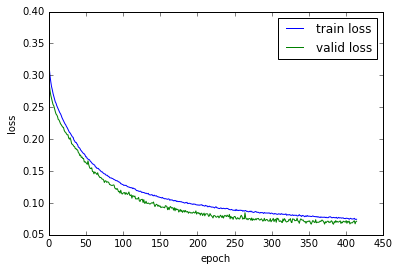

In [6]:
# this is the plot on cylinder_small1 with regularization and patience counter 50 and data augmentation
plot_loss(cnn)

In [7]:
from sklearn.metrics import classification_report, accuracy_score


In [8]:
y_true, y_pred = y_test, cnn.predict({'image_input': X_test['image'],
           'prob_input': X_test['prob'],
           'binary_input': X_test['merged_array']})

In [9]:
print(classification_report(y_true, y_pred))


             precision    recall  f1-score   support

          0       0.92      0.89      0.90     13408
          1       0.89      0.92      0.91     13408

avg / total       0.91      0.91      0.91     26816



In [16]:
with open('/home/d/nets/MergeNet_cylinder1_nooverlap_usevars/net.p', 'wb') as f:
    pickle.dump(cnn, f)

In [11]:
import cPickle as pickle

In [14]:
import sys

In [15]:
sys.setrecursionlimit(10000000)